In [1]:
#Proyecto EDEMNU de DATA SCIENCE
#Importamos todas las librerias que vamos a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [2]:
#Cargar las bases de datos
#Importante: Cambiar la ruta de la base de datos
path="C:/Users/alepe/Documents/DATA_SCIENCE/Proyecto_EDEMNU/bases/"

dfp01=pd.read_csv(path+"inec_enemdu_personas_2020_septiembre.csv", sep=";")

dfp02=pd.read_csv(path+"inec_enemdu_persona_2020_diciembre.csv", sep=";")

dfp03=pd.read_csv(path+"inec_enemdu_persona_2021_enero.csv", sep=";")

dfp04=pd.read_csv(path+"inec_enemdu_persona_2021_febrero.csv", sep=";")

dfp05=pd.read_csv(path+"inec_enemdu_persona_2021_marzo.csv", sep=";")

dfp06=pd.read_csv(path+"inec_enemdu_persona_2021_abril.csv", sep=";")

dfp07=pd.read_csv(path+"inec_enemdu_persona_2021_mayo.csv", sep=";")

dfp08=pd.read_csv(path+"inec_enemdu_persona_2021_junio.csv", sep=";")

dfp09=pd.read_csv(path+"inec_enemdu_persona_2021_julio.csv", sep=";")

dfp10=pd.read_csv(path+"inec_enemdu_persona_2021_agosto.csv", sep=";")

dfp11=pd.read_csv(path+"inec_enemdu_persona_2021_septiembre.csv", sep=";")

C:\Users\alepe\AppData\Local\Temp\ipykernel_1812\735814632.py:4: DtypeWarning: Columns (96) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp01=pd.read_csv(path+"inec_enemdu_personas_2020_septiembre.csv", sep=";")
C:\Users\alepe\AppData\Local\Temp\ipykernel_1812\735814632.py:6: DtypeWarning: Columns (162) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp02=pd.read_csv(path+"inec_enemdu_persona_2020_diciembre.csv", sep=";")
C:\Users\alepe\AppData\Local\Temp\ipykernel_1812\735814632.py:18: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp08=pd.read_csv(path+"inec_enemdu_persona_2021_junio.csv", sep=";")
C:\Users\alepe\AppData\Local\Temp\ipykernel_1812\735814632.py:20: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  dfp09=pd.read_csv(path+"inec_enemdu_persona_2021_julio.csv", sep=";")
C:\Users\alepe\AppData\Local\Temp

In [3]:
#Crear un sólo dataframe
df1 = pd.concat([dfp01, dfp02, dfp03, dfp04, dfp05, dfp06, dfp07, dfp08, dfp09, dfp10, dfp11], ignore_index=True)
df1.head(10)

,area,vivienda,hogar,p01,p02,p03,p04,p05,p06,p07,...,sd029,sd0210,sd0211,sd03,grupo1,rama1,ingpc,pobreza,epobreza,nnivins
0,1,1.0,1.0,1,1,39,1,10.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,2,2,38,2,10.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.0,1.0,3,2,20,3,10.0,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,1.0,4,1,1,3,10.0,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2.0,1.0,1,2,52,1,10.0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2.0,1.0,2,2,32,3,10.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2.0,1.0,3,1,47,4,10.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,2.0,1.0,4,1,11,5,10.0,,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,4.0,1.0,1,1,43,1,10.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,4.0,1.0,2,2,39,2,10.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Nos quedamos sólo con las variables que nos interesan
df1=df1[["p01","area","p02", "p03","upm", "p06", "p10a", "p10b", "p20","p24","p42", "p43", "p44f", "p49","p44j", "p44k","p59", "ingrl"]]

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331584 entries, 0 to 331583
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   p01     331584 non-null  int64 
 1   area    331584 non-null  int64 
 2   p02     331584 non-null  int64 
 3   p03     331584 non-null  int64 
 4   upm     331584 non-null  int64 
 5   p06     331584 non-null  object
 6   p10a    331584 non-null  object
 7   p10b    331584 non-null  object
 8   p20     331584 non-null  object
 9   p24     331584 non-null  object
 10  p42     331584 non-null  object
 11  p43     301267 non-null  object
 12  p44f    331584 non-null  object
 13  p49     331584 non-null  object
 14  p44j    301267 non-null  object
 15  p44k    301267 non-null  object
 16  p59     301267 non-null  object
 17  ingrl   331584 non-null  object
dtypes: int64(5), object(13)
memory usage: 45.5+ MB


In [6]:
#Exportamos la base que vamos a limpiar para trabajar con ella. Las 11 bases de datos pesan demasiado para trabajar con ellas por separado
df1.to_csv(path+"filename.csv", index=False)

In [7]:
#Cargamos la base de datos como un dataframe
df1=pd.read_csv(path+"filename.csv", sep=";")

In [ ]:
#Sólo nos interesan las siguientes variables:
#Area
#Unidad primaria de muestreo (upm)
#Persona (p01)
#sexo (p02)
#edad (p03)
#estado civil (p06)
#nivel de instrucción (p10a)
#año aprobado (p10b)
#trabajó la semana pasada (p20)
#horas de trabajo (p24)
#categoría de ocupación (p42)
#tipo contrato (p43)
#recibe seguro social (p44f)
#trabaja en un establecimiento con RUC (p49)
#recibe 13er sueldo (p44j)
#Cómo se siente en su trabajo (p59)
#ingresos laborales (ingrl)

In [7]:
#Vamos a homologar los años de educación
df1["p10a"]= pd.to_numeric(df1["p10a"], errors='coerce')
df1["p10b"]= pd.to_numeric(df1["p10b"], errors='coerce')

In [8]:
#Los diferentes valores que toma la variable p10a significan el último año de educación aprobado por el indiviudo, y por tanto, diferentes años de educación. Vamos a homologarlos.
def transform_education(p10a):
  if p10a ==1:
    return 0
  elif p10a == 2:
    return 0
  elif p10a == 4:
    return 2 
  elif p10a == 5:
    return 2
  elif p10a == 6:
    return 7
  elif p10a == 7:
    return 10
  elif p10a == 8:
    return 13
  elif p10a == 9:
    return 13
  elif p10a == 10:
    return 18

In [9]:
df1['new_p10a'] = df1['p10a'].apply(transform_education)
df1['edu_years'] = df1['new_p10a'] + df1['p10b']
df1["edu_years"].describe()

count    300842.000000
mean         11.065097
std           4.174756
min           0.000000
25%           8.000000
50%          12.000000
75%          13.000000
max          23.000000
Name: edu_years, dtype: float64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331584 entries, 0 to 331583
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   p01        331584 non-null  int64  
 1   area       331584 non-null  int64  
 2   p02        331584 non-null  int64  
 3   p03        331584 non-null  int64  
 4   upm        331584 non-null  int64  
 5   p06        331584 non-null  object 
 6   p10a       310442 non-null  float64
 7   p10b       300842 non-null  float64
 8   p20        331584 non-null  object 
 9   p24        331584 non-null  object 
 10  p42        331584 non-null  object 
 11  p43        301267 non-null  object 
 12  p44f       331584 non-null  object 
 13  p49        331584 non-null  object 
 14  p44j       301267 non-null  object 
 15  p44k       301267 non-null  object 
 16  p59        301267 non-null  object 
 17  ingrl      331584 non-null  object 
 18  new_p10a   310442 non-null  float64
 19  edu_years  300842 non-n

In [11]:
#Algunas variables deben ser numéricas:
df1["p49"] = pd.to_numeric(df1["p49"], errors='coerce')
df1["ingrl"] = pd.to_numeric(df1["ingrl"], errors='coerce')
df1["p44k"] = pd.to_numeric(df1["p44k"], errors='coerce')
df1["p06"] = pd.to_numeric(df1["p06"], errors='coerce')
df1["p42"] = pd.to_numeric(df1["p42"], errors='coerce')
df1["p24"] = pd.to_numeric(df1["p24"], errors='coerce')
df1["p43"] = pd.to_numeric(df1["p43"], errors='coerce')

In [12]:
df1["ingrl"].describe()

count    131927.000000
mean      12520.827010
std      109070.460795
min          -1.000000
25%         150.000000
50%         348.000000
75%         590.000000
max      999999.000000
Name: ingrl, dtype: float64

In [13]:
#Vamos a droppear los outliers de los ingresos
q_low=df1["ingrl"].quantile(0.02)
q_hi  =df1["ingrl"].quantile(0.98)
df1 = df1[(df1["ingrl"] < q_hi) & (df1["ingrl"] > q_low)]

df1 = df1[df1['ingrl'] >=0]
df1 = df1[df1['ingrl'] != 999999]

In [14]:
df1["ingrl"].describe()

count    123436.000000
mean        456.536505
std         427.094837
min           1.000000
25%         168.000000
50%         358.000000
75%         580.000000
max        2998.000000
Name: ingrl, dtype: float64

In [15]:
#Vamos a crear una variable logarítmica de los ingresos
df1["log_ingrl"] = np.log(df1["ingrl"])

In [16]:
#Vamos a droppear los outliers de horas de trabajo a la semana
q_low=df1["p24"].quantile(0.02)
q_hi  =df1["p24"].quantile(0.98)
df1 = df1[(df1["p24"] < q_hi) & (df1["p24"] > q_low)]

In [17]:
#Vamos a preparar la variable que captura el nivel de satisfacción con el trabajo
df1['p59'] = df1['p59'].replace({"1": 'contento', "2": 'poco contento', "3": "descontento, conforme", "4": "totalmente descontento", "5": "no sabe/responde", None:"no sabe/responde", " ":"no sabe/responde"})

In [18]:
df1["p24"].describe()

count    117492.000000
mean         36.543092
std          12.474801
min           8.000000
25%          30.000000
50%          40.000000
75%          40.000000
max          69.000000
Name: p24, dtype: float64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117492 entries, 0 to 331581
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   p01        117492 non-null  int64  
 1   area       117492 non-null  int64  
 2   p02        117492 non-null  int64  
 3   p03        117492 non-null  int64  
 4   upm        117492 non-null  int64  
 5   p06        117486 non-null  float64
 6   p10a       117492 non-null  float64
 7   p10b       115030 non-null  float64
 8   p20        117492 non-null  object 
 9   p24        117492 non-null  float64
 10  p42        117492 non-null  float64
 11  p43        60606 non-null   float64
 12  p44f       117492 non-null  object 
 13  p49        89613 non-null   float64
 14  p44j       107257 non-null  object 
 15  p44k       60606 non-null   float64
 16  p59        117492 non-null  object 
 17  ingrl      117492 non-null  float64
 18  new_p10a   117492 non-null  float64
 19  edu_years  115030 non-n

In [20]:
#Vamos a comenzar a crear el dataframe para la gente que tiene empleo formal

#Droppear menores de 18
df_trabajo_formal = df1[df1["p03"] >= 18]


In [21]:

#droppear gente sin ingresos
df_trabajo_formal = df_trabajo_formal[df_trabajo_formal["ingrl"] > 0]


In [22]:

#Droppear gente que trabaja en un establecimiento sin ruc 
#1->Si, 2->No, 3->No sabe
df_trabajo_formal= df_trabajo_formal[df_trabajo_formal["p49"].isin([1, 3])]


In [23]:

#Droppear gente que no recibe  14° sueldo
df_trabajo_formal = df_trabajo_formal[df_trabajo_formal["p44k"] ==1]


In [24]:

#Cambiar los null values por NaN

df_trabajo_formal = df_trabajo_formal.replace(r'^\s*$', np.nan, regex=True)


In [25]:
#Vamos a ver cómo nos queda la base de datos final

df_trabajo_formal.head(10)

,p01,area,p02,p03,upm,p06,p10a,p10b,p20,p24,...,p43,p44f,p49,p44j,p44k,p59,ingrl,new_p10a,edu_years,log_ingrl
30349,5,1,1,30,200350000049,6.0,6.0,6.0,1,12.0,...,3.0,1,1.0,1,1.0,contento,1220.0,7.0,13.0,7.106606
30368,2,2,1,30,200150000074,6.0,4.0,6.0,1,48.0,...,2.0,1,1.0,1,1.0,contento,895.0,2.0,8.0,6.796824
30381,1,1,1,50,200350000086,1.0,4.0,6.0,1,40.0,...,2.0,1,1.0,1,1.0,poco contento,860.0,2.0,8.0,6.756932
30390,1,2,1,29,10360000101,5.0,9.0,5.0,1,40.0,...,2.0,1,1.0,1,1.0,contento,820.0,13.0,18.0,6.709304
30413,1,1,1,54,10550000101,1.0,4.0,6.0,1,30.0,...,2.0,1,1.0,1,1.0,contento,330.0,2.0,8.0,5.799093
30477,3,2,2,22,71251000101,6.0,9.0,5.0,1,40.0,...,3.0,1,1.0,1,1.0,"descontento, conforme",620.0,13.0,18.0,6.429719
30725,1,2,2,31,11050000102,6.0,6.0,6.0,1,20.0,...,3.0,1,1.0,1,1.0,poco contento,240.0,7.0,13.0,5.480639
30870,3,1,2,36,180150000102,3.0,9.0,3.0,1,40.0,...,2.0,1,1.0,1,1.0,poco contento,418.0,13.0,16.0,6.035481
31006,2,1,2,28,70450000103,5.0,7.0,2.0,1,40.0,...,3.0,1,1.0,1,1.0,contento,500.0,10.0,12.0,6.214608
31032,2,2,2,29,80163000103,6.0,6.0,6.0,1,40.0,...,2.0,1,1.0,1,1.0,contento,490.0,7.0,13.0,6.194405


In [26]:
df_trabajo_formal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10095 entries, 30349 to 331557
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   p01        10095 non-null  int64  
 1   area       10095 non-null  int64  
 2   p02        10095 non-null  int64  
 3   p03        10095 non-null  int64  
 4   upm        10095 non-null  int64  
 5   p06        10095 non-null  float64
 6   p10a       10095 non-null  float64
 7   p10b       10069 non-null  float64
 8   p20        10095 non-null  object 
 9   p24        10095 non-null  float64
 10  p42        10095 non-null  float64
 11  p43        10095 non-null  float64
 12  p44f       10095 non-null  object 
 13  p49        10095 non-null  float64
 14  p44j       10095 non-null  object 
 15  p44k       10095 non-null  float64
 16  p59        10095 non-null  object 
 17  ingrl      10095 non-null  float64
 18  new_p10a   10095 non-null  float64
 19  edu_years  10069 non-null  float64
 20  l

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117492 entries, 0 to 331581
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   p01        117492 non-null  int64  
 1   area       117492 non-null  int64  
 2   p02        117492 non-null  int64  
 3   p03        117492 non-null  int64  
 4   upm        117492 non-null  int64  
 5   p06        117486 non-null  float64
 6   p10a       117492 non-null  float64
 7   p10b       115030 non-null  float64
 8   p20        117492 non-null  object 
 9   p24        117492 non-null  float64
 10  p42        117492 non-null  float64
 11  p43        60606 non-null   float64
 12  p44f       117492 non-null  object 
 13  p49        89613 non-null   float64
 14  p44j       107257 non-null  object 
 15  p44k       60606 non-null   float64
 16  p59        117492 non-null  object 
 17  ingrl      117492 non-null  float64
 18  new_p10a   117492 non-null  float64
 19  edu_years  115030 non-n

In [28]:
#Vamos a describir las variables continuas para toda la muestra
df1[['p03', 'edu_years', 'ingrl', 'p24']].describe()

,p03,edu_years,ingrl,p24
count,117492.000000,115030.000000,117492.000000,117492.000000
mean,42.226313,12.288368,463.006222,36.543092
std,14.425308,4.050552,426.632994,12.474801
min,7.000000,0.000000,1.000000,8.000000
25%,30.000000,8.000000,180.000000,30.000000
50%,41.000000,13.000000,360.000000,40.000000
75%,52.000000,15.000000,588.250000,40.000000
max,98.000000,23.000000,2998.000000,69.000000


In [29]:
#Vamos a describir las variables continuas para la muestra de trabajo formal
df_trabajo_formal[['p03', 'edu_years', 'ingrl', 'p24']].describe()

,p03,edu_years,ingrl,p24
count,10095.000000,10069.000000,10095.000000,10095.000000
mean,38.286776,14.018175,643.520158,41.041407
std,11.579306,3.528921,361.748767,8.490444
min,18.000000,1.000000,2.000000,8.000000
25%,29.000000,13.000000,438.000000,40.000000
50%,37.000000,13.000000,520.000000,40.000000
75%,46.000000,18.000000,770.000000,44.000000
max,89.000000,22.000000,2985.000000,69.000000


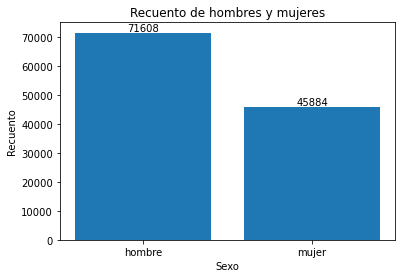

In [30]:
#Vamos a graficar a los hombres y mujeres de toda la muestra

# Replace "1" and "2" values with "hombre" and "mujer"
df1['p02'] = df1['p02'].replace({1: 'hombre', 2: 'mujer'})

# Get value counts of p02
value_counts = df1['p02'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
plt.bar(x_vals, y_vals)
plt.xlabel('Sexo')
plt.ylabel('Recuento')
plt.title('Recuento de hombres y mujeres')

# Add value labels to bars
for i, value in enumerate(y_vals):
  plt.text(i, value, str(value), ha='center', va='bottom')

# Show bar chart
plt.show()


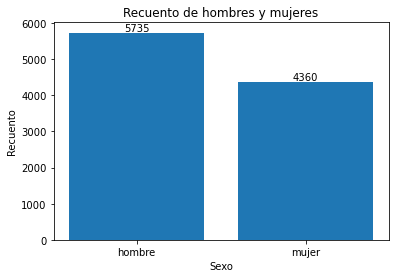

In [31]:
#Vamos a graficar a los hombres y mujeres de las personas que tienen trabajo formal

# Replace "1" and "2" values with "hombre" and "mujer"
df_trabajo_formal['p02'] = df_trabajo_formal['p02'].replace({1: 'hombre', 2: 'mujer'})

# Get value counts of p02
value_counts = df_trabajo_formal['p02'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
plt.bar(x_vals, y_vals)
plt.xlabel('Sexo')
plt.ylabel('Recuento')
plt.title('Recuento de hombres y mujeres')

# Add value labels to bars
for i, value in enumerate(y_vals):
  plt.text(i, value, str(value), ha='center', va='bottom')

# Show bar chart
plt.show()


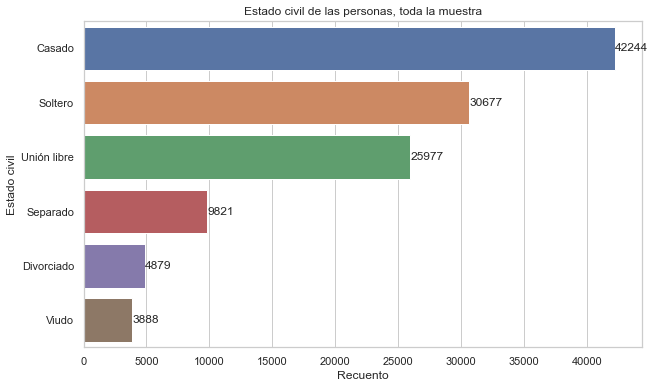

In [32]:
#Vamos a graficar el estado civil de las personas
df1['p06'] = df1['p06'].replace({1: 'Casado', 2: 'Separado', 3:"Divorciado", 4: "Viudo", 5: "Unión libre", 6: "Soltero"})

# Get value counts of p06
value_counts = df1['p06'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Estado civil de las personas, toda la muestra')
plt.xlabel('Recuento')
plt.ylabel('Estado civil')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

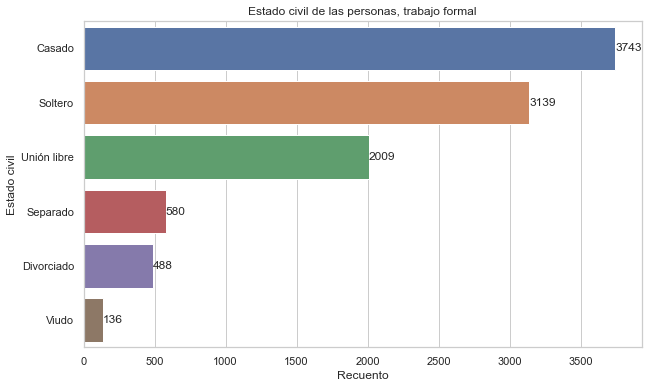

In [33]:
#Vamos a graficar el estado civil de las personas
df_trabajo_formal['p06'] = df_trabajo_formal['p06'].replace({1: 'Casado', 2: 'Separado', 3:"Divorciado", 4: "Viudo", 5: "Unión libre", 6: "Soltero"})

# Get value counts of p06
value_counts = df_trabajo_formal['p06'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Estado civil de las personas, trabajo formal')
plt.xlabel('Recuento')
plt.ylabel('Estado civil')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

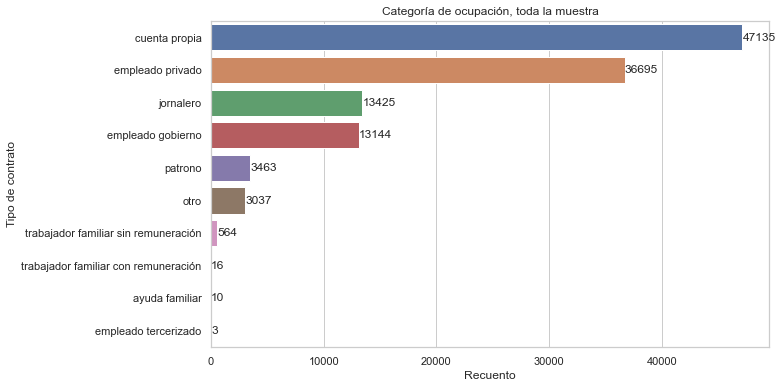

In [34]:
#Vamos a ver las categorías de ocupación de toda la muestra

df1['p42'] = df1['p42'].replace({1: "empleado gobierno", 2: 'empleado privado', 3: "empleado tercerizado", 4: 'jornalero', 5: "patrono", 6: "cuenta propia", 7: "trabajador familiar sin remuneración", 8: "trabajador familiar con remuneración", 9: "ayuda familiar", 10: "otro"})

# Get value counts of p02
value_counts = df1['p42'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Categoría de ocupación, toda la muestra')
plt.xlabel('Recuento')
plt.ylabel('Tipo de contrato')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

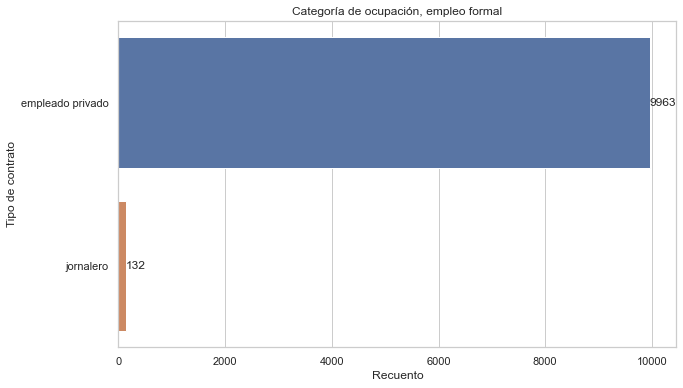

In [35]:
#Vamos a ver la categoría de ocupación de las personas que tienen trabajo formal

df_trabajo_formal['p42'] = df_trabajo_formal['p42'].replace({1: "empleado gobierno", 2: 'empleado privado', 3: "empleado tercerizado", 4: 'jornalero', 5: "patrono", 6: "cuenta propia", 7: "trabajador familiar sin remuneración", 8: "trabajador familiar con remuneración", 9: "ayuda familiar", 10: "otro"})

# Get value counts of p02
value_counts = df_trabajo_formal['p42'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Categoría de ocupación, empleo formal')
plt.xlabel('Recuento')
plt.ylabel('Tipo de contrato')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

In [36]:
df1['p43'].value_counts()

2.0    23029
3.0    16460
6.0    11849
1.0     8626
5.0      380
4.0      262
Name: p43, dtype: int64

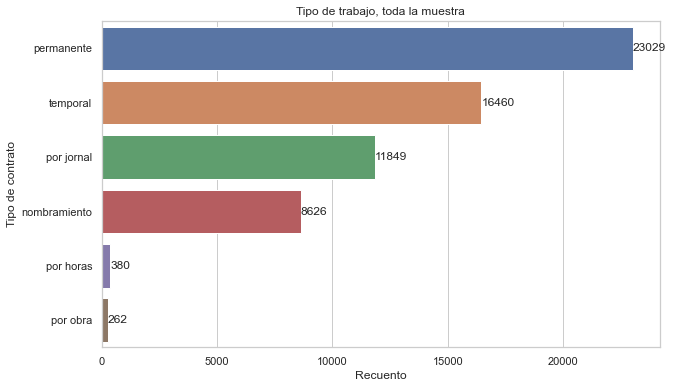

In [37]:
#Vamos a ver el tipo de contrato bajo el cual laboran las personas de toda la muestra

#Hay que cambiar los valores de p43
df1['p43'] = df1['p43'].replace({1: "nombramiento", 2: 'permanente', 3: 'temporal', 4: "por obra", 5: "por horas", 6: "por jornal"})

# Get value counts of p02
value_counts = df1['p43'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Tipo de trabajo, toda la muestra')
plt.xlabel('Recuento')
plt.ylabel('Tipo de contrato')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

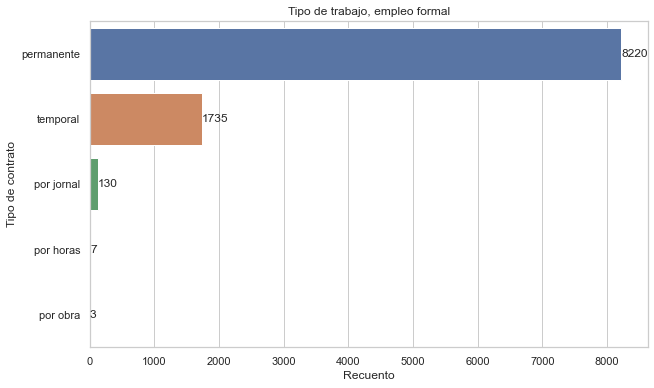

In [38]:
#Vamos a ver el tipo de contrato bajo el cual laboran las personas de toda la muestra

#Hay que cambiar los valores de p43
df_trabajo_formal['p43'] = df_trabajo_formal['p43'].replace({1: "nombramiento", 2: 'permanente', 3: 'temporal', 4: "por obra", 5: "por horas", 6: "por jornal"})

# Get value counts of p02
value_counts = df_trabajo_formal['p43'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Tipo de trabajo, empleo formal')
plt.xlabel('Recuento')
plt.ylabel('Tipo de contrato')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

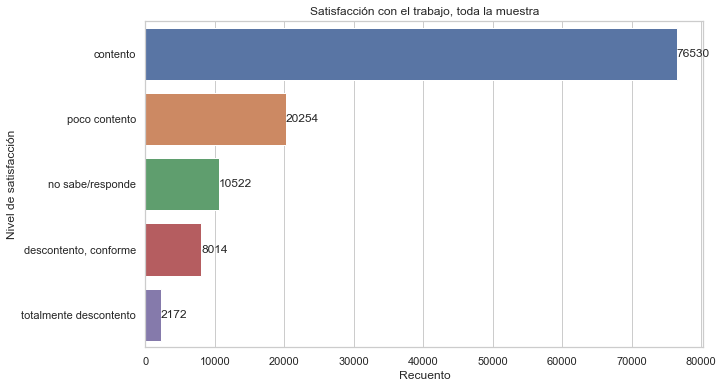

In [39]:
#Vamos a ver el nivel de satisfacción laboral de las personas de toda la muestra
value_counts = df1['p59'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Satisfacción con el trabajo, toda la muestra')
plt.xlabel('Recuento')
plt.ylabel('Nivel de satisfacción')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

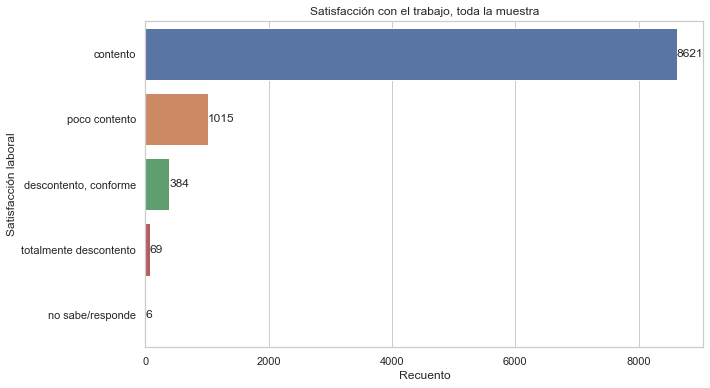

In [40]:
#Vamos a ver el nivel de satisfacción laboral de las personas que tienen trabajo formal
value_counts = df_trabajo_formal['p59'].value_counts()

# Prepare data for bar chart
x_vals = value_counts.index.to_list()
y_vals = value_counts.to_list()

# Create bar chart
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=y_vals, y=x_vals)

# Add value labels to bars
plt.title('Satisfacción con el trabajo, toda la muestra')
plt.xlabel('Recuento')
plt.ylabel('Satisfacción laboral')
ax.bar_label(ax.containers[0])
# Show bar chart
plt.show()

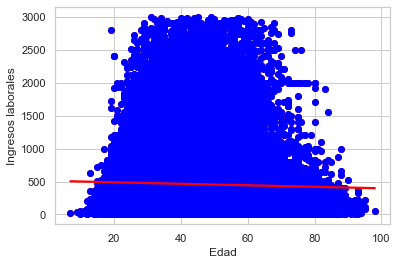

In [41]:
#Vamos a ver la relación entre ingresos y edad de todas las personas de la muestra
sns.regplot(x="p03", y="ingrl", data=df1, color="red")
plt.scatter(x="p03", y="ingrl", data=df1, color="blue")

plt.xlabel("Edad")
plt.ylabel("Ingresos laborales")

plt.show()

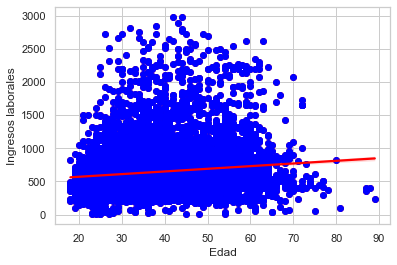

In [42]:
#Vamos a ver la relación entre ingresos y edad de las personas que tienen trabajo formal
sns.regplot(x="p03", y="ingrl", data=df_trabajo_formal, color="red")
plt.scatter(x="p03", y="ingrl", data=df_trabajo_formal, color="blue")

plt.xlabel("Edad")
plt.ylabel("Ingresos laborales")

plt.show()

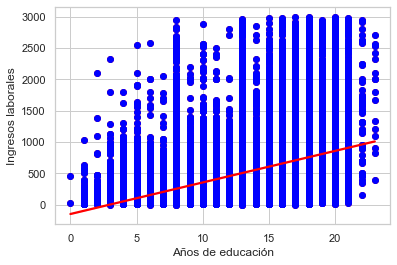

In [43]:
#Vamos a ver la relación entre ingresos y años de educación de todas las personas de la muestra
sns.regplot(x="edu_years", y="ingrl", data=df1, color="red")
plt.scatter(x="edu_years", y="ingrl", data=df1, color="blue")

plt.xlabel("Años de educación")
plt.ylabel("Ingresos laborales")

plt.show()

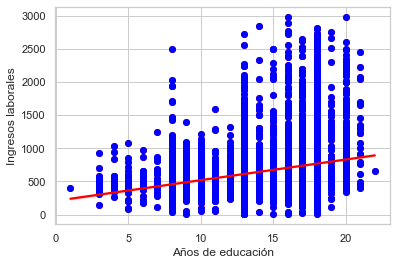

In [44]:
#Vamos a ver la relación entre ingresos y años de educación de las personas que tienen trabajo formal
sns.regplot(x="edu_years", y="ingrl", data=df_trabajo_formal, color="red")
plt.scatter(x="edu_years", y="ingrl", data=df_trabajo_formal, color="blue")

plt.xlabel("Años de educación")
plt.ylabel("Ingresos laborales")

plt.show()

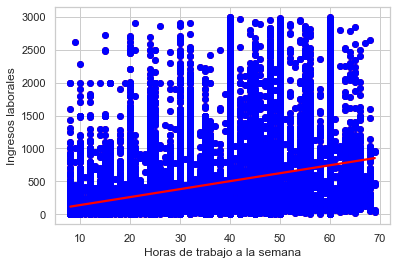

In [45]:
#Vamos a ver la relación entre ingresos y horas de trabajo a la semana de todas las personas de la muestra
sns.regplot(x="p24", y="ingrl", data=df1, color="red")
plt.scatter(x="p24", y="ingrl", data=df1, color="blue")

plt.xlabel("Horas de trabajo a la semana")
plt.ylabel("Ingresos laborales")

plt.show()

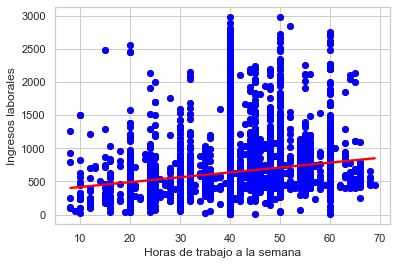

In [46]:
#Vamos a ver la relación entre ingresos y horas de trabajo a la semana de las personas que tienen trabajo formal
sns.regplot(x="p24", y="ingrl", data=df_trabajo_formal, color="red")
plt.scatter(x="p24", y="ingrl", data=df_trabajo_formal, color="blue")

plt.xlabel("Horas de trabajo a la semana")
plt.ylabel("Ingresos laborales")

plt.show()

In [47]:
df1["p59"].value_counts()

contento                  76530
poco contento             20254
no sabe/responde          10522
descontento, conforme      8014
totalmente descontento     2172
Name: p59, dtype: int64

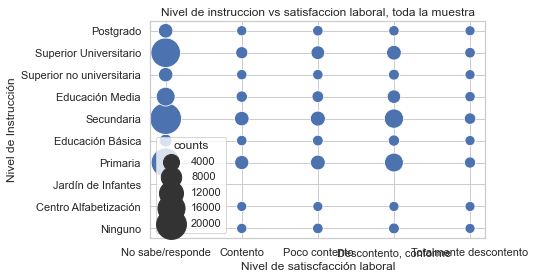

<Figure size 1440x1440 with 0 Axes>

In [48]:
#Vamos a ver la relación entre años de educación y satisfacción laboral de las personas de toda la muestra
df1b=df1.groupby(by=["p59", "p10a"]).size().reset_index(name='counts')

sns.scatterplot(data=df1b, y="p10a", x="p59", size="counts", sizes=(100, 1000) )

# Set the title and axes labels
plt.title("Nivel de instruccion vs satisfaccion laboral, toda la muestra")
plt.xlabel("Nivel de satiscfacción laboral")
plt.ylabel("Nivel de Instrucción")

# Set tick labels for x-axis
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Ninguno', 'Centro Alfabetización', 'Jardín de Infantes', 'Primaria', 'Educación Básica', 'Secundaria', 'Educación Media', 'Superior no universitaria', 'Superior Universitario', 'Postgrado'])

# Set tick labels for y-axis
plt.xticks([0, 1, 2, 3, 4], ['No sabe/responde','Contento', 'Poco contento', 'Descontento, conforme', 'Totalmente descontento'])
plt.figure(figsize=(20, 20))
# Show the plot
plt.show()

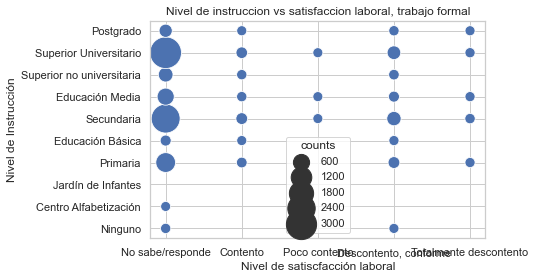

<Figure size 1440x1440 with 0 Axes>

In [49]:
#Vamos a ver la relación entre años de educación y satisfacción laboral de las personas que tienen trabajo formal
df_trabajo_formal_b=df_trabajo_formal.groupby(by=["p59", "p10a"]).size().reset_index(name='counts')

sns.scatterplot(data=df_trabajo_formal_b, y="p10a", x="p59", size="counts", sizes=(100, 1000) )

# Set the title and axes labels
plt.title("Nivel de instruccion vs satisfaccion laboral, trabajo formal")
plt.xlabel("Nivel de satiscfacción laboral")
plt.ylabel("Nivel de Instrucción")

# Set tick labels for x-axis
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Ninguno', 'Centro Alfabetización', 'Jardín de Infantes', 'Primaria', 'Educación Básica', 'Secundaria', 'Educación Media', 'Superior no universitaria', 'Superior Universitario', 'Postgrado'])

# Set tick labels for y-axis
plt.xticks([0, 1, 2, 3, 4], ['No sabe/responde','Contento', 'Poco contento', 'Descontento, conforme', 'Totalmente descontento'])
plt.figure(figsize=(20, 20))
# Show the plot
plt.show()

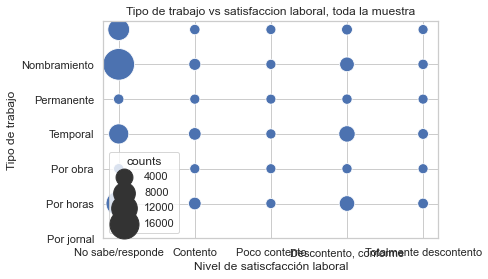

<Figure size 1440x1440 with 0 Axes>

In [50]:
#Vamos a ver la relación entre tipo de trabajo y satisfacción laboral de las personas de toda la muestra
#df_trabajo_formal['p43'] = df_trabajo_formal['p43'].replace({1: "nombramiento", 2: 'permanente', 3: 'temporal', 4: "por obra", 5: "por horas", 6: "por jornal"})
df1_c=df1.groupby(by=["p59", "p43"]).size().reset_index(name='counts')

sns.scatterplot(data=df1_c, y="p43", x="p59", size="counts", sizes=(100, 1000) )

# Set the title and axes labels
plt.title("Tipo de trabajo vs satisfaccion laboral, toda la muestra")
plt.xlabel("Nivel de satiscfacción laboral")
plt.ylabel("Tipo de trabajo")

# Set tick labels for x-axis
plt.yticks([1, 2, 3, 4, 5, 6], ["Nombramiento", "Permanente", "Temporal", "Por obra", "Por horas", "Por jornal"])

# Set tick labels for y-axis
plt.xticks([0, 1, 2, 3, 4], ['No sabe/responde','Contento', 'Poco contento', 'Descontento, conforme', 'Totalmente descontento'])
plt.figure(figsize=(20, 20))
# Show the plot
plt.show()

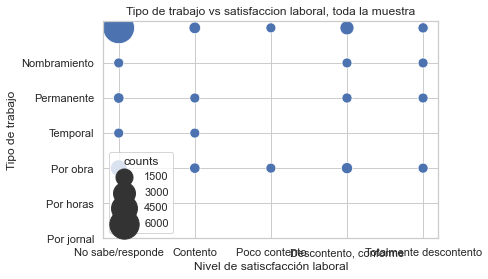

<Figure size 720x1440 with 0 Axes>

In [51]:
#Vamos a ver la relación entre tipo de trabajo y satisfacción laboral de las personas, trabajo formal
#df_trabajo_formal['p43'] = df_trabajo_formal['p43'].replace({1: "nombramiento", 2: 'permanente', 3: 'temporal', 4: "por obra", 5: "por horas", 6: "por jornal"})
df_trabajo_formal_c=df_trabajo_formal.groupby(by=["p59", "p43"]).size().reset_index(name='counts')

sns.scatterplot(data=df_trabajo_formal_c, y="p43", x="p59", size="counts", sizes=(100, 1000) )

# Set the title and axes labels
plt.title("Tipo de trabajo vs satisfaccion laboral, toda la muestra")
plt.xlabel("Nivel de satiscfacción laboral")
plt.ylabel("Tipo de trabajo")

# Set tick labels for x-axis
plt.yticks([1, 2, 3, 4, 5, 6], ["Nombramiento", "Permanente", "Temporal", "Por obra", "Por horas", "Por jornal"])

# Set tick labels for y-axis
plt.xticks([0, 1, 2, 3, 4], ['No sabe/responde','Contento', 'Poco contento', 'Descontento, conforme', 'Totalmente descontento'])
plt.figure(figsize=(10, 20))
# Show the plot
plt.show()

In [52]:
#Vamos a hacer las preparaciones para correr una regresión OPROBIT

#Vamos a quitar de la base a las personas que no responden la pregunta de satisfacción
df1 = df1[df1['p59'] != "no sabe/responde"]

df1["p59"].value_counts()

contento                  76530
poco contento             20254
descontento, conforme      8014
totalmente descontento     2172
Name: p59, dtype: int64

In [53]:
#Necesitamos que satisfacción sea una variable categórica
df1['satisfaccion'] = df1['p59'].astype('category')
df1["satisfaccion"].dtype

CategoricalDtype(categories=['contento', 'descontento, conforme', 'poco contento',
                  'totalmente descontento'],
, ordered=False)

In [54]:
#Vamos a dar orden a los posibles grados de satisfacción
df1['satisfaccion'] = df1['satisfaccion'].cat.reorder_categories(['totalmente descontento', 'descontento, conforme', 'poco contento','contento'], ordered=True)

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106970 entries, 30319 to 331581
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   p01           106970 non-null  int64   
 1   area          106970 non-null  int64   
 2   p02           106970 non-null  object  
 3   p03           106970 non-null  int64   
 4   upm           106970 non-null  int64   
 5   p06           106970 non-null  object  
 6   p10a          106970 non-null  float64 
 7   p10b          104809 non-null  float64 
 8   p20           106970 non-null  object  
 9   p24           106970 non-null  float64 
 10  p42           106970 non-null  object  
 11  p43           60420 non-null   object  
 12  p44f          106970 non-null  object  
 13  p49           81396 non-null   float64 
 14  p44j          106970 non-null  object  
 15  p44k          60420 non-null   float64 
 16  p59           106970 non-null  object  
 17  ingrl         106970 non-

In [56]:
df1["p02"].value_counts

<bound method IndexOpsMixin.value_counts of 30319      mujer
30326     hombre
30328     hombre
30331     hombre
30335      mujer
           ...  
331572    hombre
331573    hombre
331579    hombre
331580     mujer
331581    hombre
Name: p02, Length: 106970, dtype: object>

In [57]:
#Vamos a crear una variable dummy que sea 1 si la persona es mujer y 0 si es hombre
df1["mujer"]=df1["p02"].replace({"hombre": 0, "mujer": 1.0})

In [58]:
df1.describe()

,p01,area,p03,upm,p10a,p10b,p24,p49,p44k,ingrl,new_p10a,edu_years,log_ingrl,mujer
count,106970.000000,106970.000000,106970.000000,1.069700e+05,106970.000000,104809.000000,106970.000000,81396.000000,60420.000000,106970.000000,106970.000000,104809.000000,106970.000000,106970.000000
mean,1.847266,1.265486,42.233991,1.151595e+11,6.280135,4.631282,36.594251,1.659983,1.457117,466.052819,7.524446,12.310870,5.728302,0.393157
std,1.210577,0.441594,14.403584,6.496457e+10,2.065244,1.728919,12.517916,0.620153,0.498162,429.411277,4.662566,4.047302,1.007903,0.488453
min,1.000000,1.000000,15.000000,1.015000e+10,1.000000,0.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,30.000000,7.015004e+10,4.000000,3.000000,30.000000,1.000000,1.000000,180.000000,2.000000,8.000000,5.192957,0.000000
50%,1.000000,1.000000,41.000000,1.001500e+11,6.000000,5.000000,40.000000,2.000000,1.000000,370.000000,7.000000,13.000000,5.913503,0.000000
75%,2.000000,2.000000,52.000000,1.701509e+11,9.000000,6.000000,42.000000,2.000000,2.000000,598.000000,13.000000,15.000000,6.393591,1.000000
max,15.000000,2.000000,98.000000,2.403520e+11,10.000000,10.000000,69.000000,3.000000,2.000000,2998.000000,18.000000,23.000000,8.005701,1.000000


In [59]:
#Vamos a droppear a la gente que no tenga registrados sus años de educación

df1.dropna(subset=['edu_years'], inplace=True)


In [60]:
#Vamos a crear una variable que se llame edad para que sea más fácil de interpretar
df1["edad"]=df1["p03"]
#Vamos a crear una variable para la edad al cuadrado
df1["edad^2"]=df1["p03"]**2

In [61]:
#Vamos a crear una variable que se llame horas_trabajo_sem para que sea más fácil de interpretar
df1["horas_trabajo_sem"]=df1["p24"]

In [62]:
#Necesitamos crear variables dummy para el estado civil
#Hay que hacer algunas preparaciones antes

df1["estado_civil"]=df1["p06"].astype("string")

In [63]:
df1["estado_civil"].dtype

string[python]

In [64]:
#Vamos a crear las variables dummy
df1=pd.get_dummies(df1, columns=["estado_civil"])

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104809 entries, 30319 to 331581
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   p01                       104809 non-null  int64   
 1   area                      104809 non-null  int64   
 2   p02                       104809 non-null  object  
 3   p03                       104809 non-null  int64   
 4   upm                       104809 non-null  int64   
 5   p06                       104809 non-null  object  
 6   p10a                      104809 non-null  float64 
 7   p10b                      104809 non-null  float64 
 8   p20                       104809 non-null  object  
 9   p24                       104809 non-null  float64 
 10  p42                       104809 non-null  object  
 11  p43                       59799 non-null   object  
 12  p44f                      104809 non-null  object  
 13  p49                      

In [66]:
#Vamos a correr una regresión OPROBIT para la satisfacción como variable dependiente, con ingresos, años de educación, edad, horas de trabajo a la semana, y estado civil como variables independientes
mod_prob = OrderedModel(df1['satisfaccion'],
                        df1[["log_ingrl", "mujer", "edu_years","edad","edad^2","horas_trabajo_sem","estado_civil_Casado","estado_civil_Divorciado","estado_civil_Separado","estado_civil_Unión libre","estado_civil_Viudo"]],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()
#El caso base para el estado civil es soltero, no se incluye en la regresión porque causaría multicolinealidad.

Optimization terminated successfully.
         Current function value: 0.776082
         Iterations: 55
         Function evaluations: 62
         Gradient evaluations: 62


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           satisfaccion   Log-Likelihood:                -81340.
Model:                   OrderedModel   AIC:                         1.627e+05
Method:            Maximum Likelihood   BIC:                         1.628e+05
Date:                Mon, 06 May 2024                                         
Time:                        23:57:56                                         
No. Observations:              104809                                         
Df Residuals:                  104795                                         
Df Model:                          14                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
log_ingrl                                        0.3163      0.005     61.502      0.000       0.306       0.326
mujer                                            0.2780      0.009     31.331      0.000       0.261       0.295
edu_years                                        0.0133      0.001     11.108      0.000       0.011       0.016
edad                                            -0.0433      0.002    -25.524      0.000      -0.047      -0.040
edad^2                                           0.0005   1.85e-05     29.001      0.000       0.001       0.001
horas_trabajo_sem                                0.0111      0.000     31.209      0.000       0.010       0.012
estado_civil_Casado                              0.0280      0.012      2.349      0.019       0.005       0.051
estado_civil_Divorciado                         -0.1564      0.022     -7.103      0.000      -0.200      -0.113
estado_civil_Separado                           -0.1054      0.016     -6.442      0.000      -0.137      -0.073
estado_civil_Unión libre                        -0.0195      0.012     -1.623      0.105      -0.043       0.004
estado_civil_Viudo                               0.0002      0.026      0.006      0.995      -0.051       0.052
totalmente descontento/descontento, conforme    -0.4817      0.040    -12.089      0.000      -0.560      -0.404
descontento, conforme/poco contento             -0.2374      0.011    -21.772      0.000      -0.259      -0.216
poco contento/contento                          -0.2249      0.006    -34.968      0.000      -0.238      -0.212
================================================================================================================
"""